# K-means clustering using scikit-learn

#### Import necessary libreries

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle,islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline

In [3]:
# read data
data = pd.read_csv('./csv/minute_weather.csv')

### Description of dataset
Each row in **minute_weather.csv** contains weather data captured for a one-minute interval. Each row, or sample, consists of the following variables:

* **rowID:** 	unique number for each row	(*Unit: NA*)
* **hpwren_timestamp:**	timestamp of measure	(*Unit: year-month-day hour:minute:second*)
* **air_pressure:** air pressure measured at the timestamp	(*Unit: hectopascals*)
* **air_temp:**	air temperature measure at the timestamp	(*Unit: degrees Fahrenheit*)
* **avg_wind_direction:**	wind direction averaged over the minute before the timestamp	(*Unit: degrees, with 0 means coming from the North, and increasing clockwise*)
* **avg_wind_speed:**	wind speed averaged over the minute before the timestamp	(*Unit: meters per second*)
* **max_wind_direction:**	highest wind direction in the minute before the timestamp	(*Unit: degrees, with 0 being North and increasing clockwise*)
* **max_wind_speed:**	highest wind speed in the minute before the timestamp	(*Unit: meters per second*)
* **min_wind_direction:**	smallest wind direction in the minute before the timestamp	(*Unit: degrees, with 0 being North and inceasing clockwise*)
* **min_wind_speed:**	smallest wind speed in the minute before the timestamp	(*Unit: meters per second*)
* **rain_accumulation:**	amount of accumulated rain measured at the timestamp	(*Unit: millimeters*)
* **rain_duration:**	length of time rain has fallen as measured at the timestamp	(*Unit: seconds*)
* **relative_humidity:**	relative humidity measured at the timestamp	(*Unit: percent*)

In [4]:
data.shape

(1587257, 13)

In [5]:
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [6]:
#nul = data.isnull().any(axis=1)
#data[nul]

This a hudge data set. We will concider an interval of 10 minutes instead of 1 minute.

#### Data sampling

In [7]:
sample_data = data[(data['rowID'] % 10) == 0]

sample_data.shape

(158726, 13)

### Description of dataset

In [8]:
sample_data.describe()

,rowID,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
count,1.587260e+05,158726.000000,158726.000000,158680.000000,158680.000000,158680.000000,158680.000000,158680.000000,158680.000000,158725.000000,158725.000000,158726.000000
mean,7.936250e+05,916.830161,61.851589,162.156100,2.775215,163.462144,3.400558,166.774017,2.134664,0.000318,0.409627,47.609470
std,4.582039e+05,3.051717,11.833569,95.278201,2.057624,92.452139,2.418802,97.441109,1.742113,0.011236,8.665523,26.214409
min,0.000000e+00,905.000000,31.640000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.900000
25%,3.968125e+05,914.800000,52.700000,62.000000,1.300000,68.000000,1.600000,76.000000,0.800000,0.000000,0.000000,24.700000
50%,7.936250e+05,916.700000,62.240000,182.000000,2.200000,187.000000,2.700000,180.000000,1.600000,0.000000,0.000000,44.700000
75%,1.190438e+06,918.700000,70.880000,217.000000,3.800000,223.000000,4.600000,212.000000,3.000000,0.000000,0.000000,68.000000
max,1.587250e+06,929.500000,99.500000,359.000000,31.900000,359.000000,36.000000,359.000000,31.600000,3.120000,2960.000000,93.000000


In [9]:
# transpose to get a easy observation
sample_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937509,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [10]:
sample_data[sample_data["rain_accumulation"]==0].shape

(157812, 13)

In [11]:
del sample_data['rain_accumulation']

In [12]:
sample_data[sample_data["rain_duration"]==0].shape

(157237, 12)

In [13]:
del sample_data['rain_duration']

Maximum rows of rain_accumulation and rain_duration is zero. So, deleted this two column

In [14]:
# We need to drop the rows containg null value
rows_before = sample_data.shape[0]
sample_data = sample_data.dropna()
rows_after = sample_data.shape[0]

In [15]:
# Number of rows we have droped
rows_before-rows_after

46

In [16]:
sample_data.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

### Select features of interest for clustering

In [17]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

In [18]:
selected_data = sample_data[features]

selected_data.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')

In [19]:
selected_data

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,60.5
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4
...,...,...,...,...,...,...,...
1587210,915.9,75.56,330.0,1.0,341.0,1.3,47.8
1587220,915.9,75.56,330.0,1.1,341.0,1.4,48.0
1587230,915.9,75.56,344.0,1.4,352.0,1.7,48.0
1587240,915.9,75.20,359.0,1.3,9.0,1.6,46.3


#### We need to scale our data.

In [20]:
x = StandardScaler().fit_transform(selected_data)
x

array([[-1.48456281,  0.24544455, -0.68385323, ..., -0.62153592,
        -0.74440309,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, ...,  0.03826701,
        -0.66171726, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, ..., -0.44847286,
        -0.37231683,  0.40839371],
       ...,
       [-0.30488381,  1.15818654,  1.90856325, ...,  2.0393087 ,
        -0.70306017,  0.01538018],
       [-0.30488381,  1.12776181,  2.06599745, ..., -1.67073075,
        -0.74440309, -0.04948614],
       [-0.30488381,  1.09733708, -1.63895404, ..., -1.55174989,
        -0.62037434, -0.05711747]])

fit_transform function conbines fit and transform operations which means first it calculates how much the dataset shuld be transformed to be scaled. Then it's going to apply that transformation to the dataframe we give it(selected_data). We stored the scaled data in x which will be the input of k-means model.

### Use k-means clustering

In [21]:
kmeans = KMeans(n_clusters = 14)
model = kmeans.fit(x)

In [22]:
print('Model: \n',model)

Model: 
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=14, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


### Centers of 12 cluster we have creaated

In [25]:
centers = model.cluster_centers_
print(centers)
type(centers)


[[-0.65452065 -1.22942159  0.3925256   0.66143876  0.49597291  0.6390405
   1.34019567]
 [-0.23185548  0.6477823   0.41306541  0.7312432   0.52089703  0.66875853
  -0.15255227]
 [ 1.21838983 -0.10041621 -1.13436866  1.03284244 -1.02242734  1.11174041
  -1.06537719]
 [-1.25830046 -0.81447465  0.45405699  2.03172362  0.54427237  1.9939393
   0.8566986 ]
 [ 1.25781106 -0.03639016 -1.23226647 -0.43143181 -1.08402383 -0.43102898
  -0.90799132]
 [ 0.70611163  0.47460919  0.29193308 -0.52562057  0.47751312 -0.53206864
  -0.77778436]
 [ 0.25203116  0.34108712  1.88967565 -0.64826071 -1.55177973 -0.57294338
  -0.30901219]
 [ 0.65114746 -0.9668455   0.92561713 -0.4644581   1.14845919 -0.42985646
   0.92941284]
 [ 1.19750772 -0.3491681  -1.15968762  2.72658314 -1.06273004  2.85349179
  -1.14695965]
 [-0.68181001 -0.98800018  0.29544872 -0.56741935  0.4064505  -0.56652435
   1.32485253]
 [ 0.08251279 -0.79252833 -1.21826252 -0.54911765 -1.07266342 -0.56508565
   0.90244394]
 [-0.66773789  0.583730

numpy.ndarray

For each 12 cluster the center have seven values that represent the cluster center.. the attibute is **cluster_centers_**

### Examine which clusters are close to each other and which are different from each other
It'll be great to plot these cluster centersso we can actually examine which clusters are close to each other and what separates different clusters from each other. For these here we will create two functions that help us transform the data to make it easier for plotting. We need konw about a basic function **enumerate** first.

#### enumerate example

In [26]:
l1 = ["eat","sleep","repeat"]

In [27]:
for counter, value in enumerate(l1):
    print(counter, value)

0 eat
1 sleep
2 repeat


In [28]:
my_list = ['apple', 'banana', 'grapes', 'pear']
counter_list = list(enumerate(my_list, 1))
print(counter_list)

[(1, 'apple'), (2, 'banana'), (3, 'grapes'), (4, 'pear')]


#### Function one

In [29]:
# creates a DataFrame with a column for Cluster Number.This function creates a DataFrame with the values of centers
def pd_centers(feature, centers):
    colnames = list(feature)
    colnames.append('Prediction')
    
    # Zip with a column called 'prediction' (index)
    #index =0
    #for A in enumerate(centers):
     #   z = np.append(A, index) 
      #  index += 1
  
    #or
    
    z = [np.append(A, index) for index, A in enumerate(centers)]
    d = pd.DataFrame(z, columns = colnames)
    d['Prediction'] = d['Prediction'].astype(int)
    return d

In [30]:
pd_centers(features, centers)

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,Prediction
0,-0.654521,-1.229422,0.392526,0.661439,0.495973,0.639040,1.340196,0
1,-0.231855,0.647782,0.413065,0.731243,0.520897,0.668759,-0.152552,1
2,1.218390,-0.100416,-1.134369,1.032842,-1.022427,1.111740,-1.065377,2
3,-1.258300,-0.814475,0.454057,2.031724,0.544272,1.993939,0.856699,3
4,1.257811,-0.036390,-1.232266,-0.431432,-1.084024,-0.431029,-0.907991,4
5,0.706112,0.474609,0.291933,-0.525621,0.477513,-0.532069,-0.777784,5
6,0.252031,0.341087,1.889676,-0.648261,-1.551780,-0.572943,-0.309012,6
7,0.651147,-0.966845,0.925617,-0.464458,1.148459,-0.429856,0.929413,7
8,1.197508,-0.349168,-1.159688,2.726583,-1.062730,2.853492,-1.146960,8
9,-0.681810,-0.988000,0.295449,-0.567419,0.406450,-0.566524,1.324853,9


In [31]:
# Function that creates Parallel Plots

def parallel_plot(data):
    my_colors = ['b', 'r', 'g', 'y', 'k']
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
    parallel_coordinates(data, 'Prediction', color = my_colors, marker='o')

In [32]:
P = pd_centers(features, centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,Prediction
0,-0.654521,-1.229422,0.392526,0.661439,0.495973,0.639040,1.340196,0
1,-0.231855,0.647782,0.413065,0.731243,0.520897,0.668759,-0.152552,1
2,1.218390,-0.100416,-1.134369,1.032842,-1.022427,1.111740,-1.065377,2
3,-1.258300,-0.814475,0.454057,2.031724,0.544272,1.993939,0.856699,3
4,1.257811,-0.036390,-1.232266,-0.431432,-1.084024,-0.431029,-0.907991,4
5,0.706112,0.474609,0.291933,-0.525621,0.477513,-0.532069,-0.777784,5
6,0.252031,0.341087,1.889676,-0.648261,-1.551780,-0.572943,-0.309012,6
7,0.651147,-0.966845,0.925617,-0.464458,1.148459,-0.429856,0.929413,7
8,1.197508,-0.349168,-1.159688,2.726583,-1.062730,2.853492,-1.146960,8
9,-0.681810,-0.988000,0.295449,-0.567419,0.406450,-0.566524,1.324853,9


In [33]:
### Relative humidity is less means the day is drier
#### Dry day

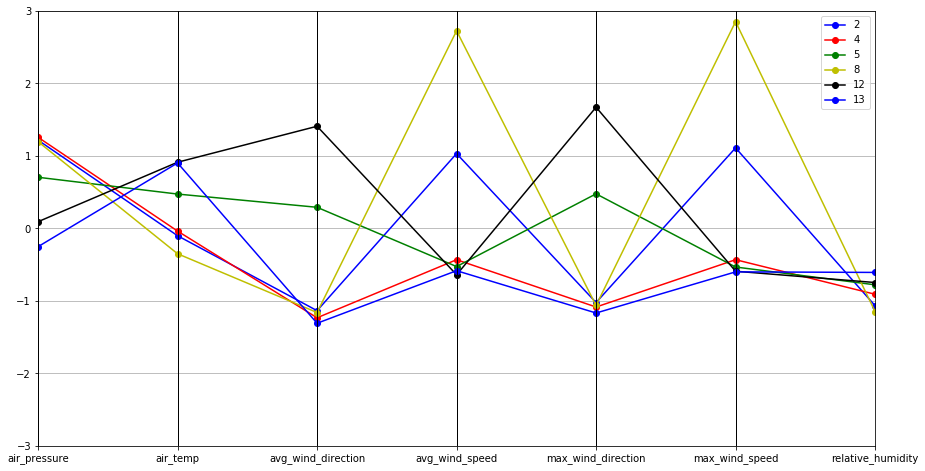

In [34]:
parallel_plot(P[P['relative_humidity'] < -0.5])